In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [3]:
def make_meshgrid(x, y, h=.02):
    """准备用于绘图的网格点

    参数
    ----------
    x: x轴数据点
    y: y轴数据点
    h: 间隔距离

    返回值
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [4]:
def plot_contours(ax, clf, xx, yy, **params):
    """绘制分类器的边界

    参数
    ----------
    ax: matplotlib axes对象
    clf: 一个分类器
    xx: 网格点
    yy: 网格点
    params: 控制绘图的其他参数字典
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z, **params)
    return out

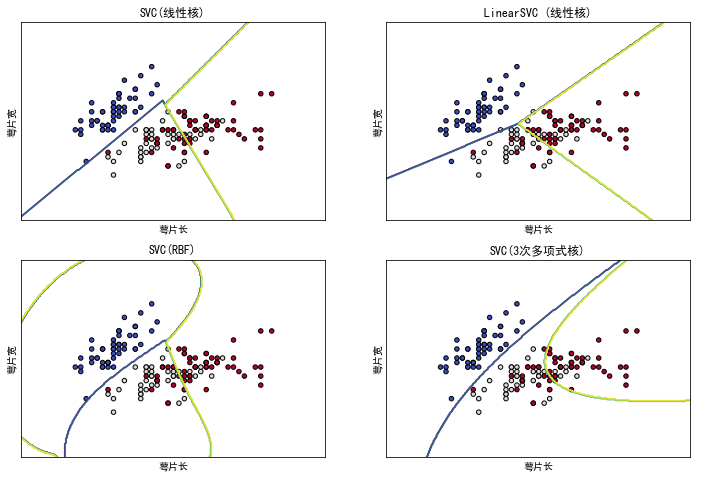

In [5]:
# 载入鸢尾花数据集
iris = datasets.load_iris()
# 为了后面绘图方便，我们只使用两个特征
X = iris.data[:, :2]
y = iris.target


C = 1.0
# 备用的各种模型设置
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
# 训练模型
models = (clf.fit(X, y) for clf in models)

# 各模型标题
titles = (u'SVC(线性核)',
          u'LinearSVC (线性核)',
          u'SVC(RBF)',
          u'SVC(3次多项式核)')

# 把整个图划分成2*2网格
fig, sub = plt.subplots(2, 2,figsize=(12,8))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(u'萼片长')
    ax.set_ylabel(u'萼片宽')
    ax.set_xticks(()) # 不显示坐标
    ax.set_yticks(()) # 不显示坐标
    ax.set_title(title)

plt.show()